# Control Group

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD,RMSprop

In [2]:
def load_data(foldpath):
    fold = os.listdir(foldpath)
    class_size = len(fold)
    subfold = os.listdir(foldpath+'/'+fold[0]+'/')
    sample_size = len(subfold)
    sample_total = 0
    for j in range(class_size):
        sample_fold = os.listdir(foldpath+'/'+fold[j])
        sample_size =len(sample_fold)
        sample_total += sample_size
    print(sample_total)
    image_sam = Image.open(foldpath+'/'+fold[0]+'/'+str(1)+'.png')
    image_sam = image.img_to_array(image_sam)
    H,L =image_sam.shape[0],image_sam.shape[1]
    print(H,L)
    sample=np.zeros([sample_total,H,L,1])
    print(sample.shape)
    target=np.zeros([sample_total,1])
    sample_per = 0
    for j in range(class_size):
        sample_fold = os.listdir(foldpath+'/'+fold[j])
        sample_size =int(len(sample_fold))
        for k in range(sample_size):
            image_sam = Image.open(foldpath+'/'+fold[j]+'/'+str(k+1)+'.png')
            image_sam = image_sam.convert('L')
            #image_sam.show()
            image_sam = image.img_to_array(image_sam)
            #image_sam = np.squeeze(image_sam)
            #print(image_sam)
            #print(sample[sample_per].shape)
            sample[sample_per]=image_sam
            if j==1 :
                target[sample_per,0] = 1
            sample_per+=1
    print(sample.shape)
    print(target.shape)
    return sample,target

In [3]:

def data_sets(folderPath):
    folders = os.listdir(folderPath)
    positive_doc = folders[0]
    negative_doc = folders[1]
    print(folders[1])
    pos_sam = os.listdir(folderPath+'/'+ positive_doc)
    neg_sam = os.listdir(folderPath+'/'+ negative_doc)
    total_pos = len(pos_sam)
    total_neg = len(neg_sam)
    print(total_pos)
    image = np.array(pd.read_excel(folderPath + '/' + folders[0] + '/' + str(pos_sam[0]) , engine='openpyxl',header=None))[:,0]
    print(image.shape[0])
    x_genuine_pair = np.zeros([total_pos, 1, image.shape[0]])  
    y_genuine = np.zeros([total_pos, 1])
    cot = 0
    for count in pos_sam:
        temp1 = np.array(pd.read_excel(folderPath+'/'+str(positive_doc)+'/'+str(count),header=None))[:,0]
        x_genuine_pair[cot,0,:] = temp1
        y_genuine[cot] = 1
        cot+=1
        
    x_false_pair = np.zeros([total_neg, 1, image.shape[0]])
    y_false = np.zeros([total_neg,1])
    cot=0
    for count in neg_sam:
        temp2 = np.array(pd.read_excel(folderPath+'/'+str(negative_doc)+'/'+str(count),header=None))[:,0]
        x_false_pair[cot,0,:] = temp2
        y_false[cot] = 0
        cot+=1
    X = np.concatenate([x_genuine_pair,x_false_pair],axis=0) 
    Y = np.concatenate([y_genuine,y_false],axis=0)
    return X,Y

In [4]:
folderPath ='datajcn'
X,Y=data_sets(folderPath)
print(X.shape,Y.shape)

normal
75
1000
(150, 1, 1000) (150, 1)


In [5]:
X_min=np.min(X,2)
X_max=np.max(X,2)

# for i in range(X.shape[0]):
#     for j in range(X.shape[2]):
#         X[i,0,j]=(X[i,0,j]-X_min[i,0])/(X_max[i,0]-X_min[i,0])
X_max_abs=X_max

for i in range(X.shape[0]):
    for j in range(X.shape[2]):
        if np.absolute(X_min[i,0])>X_max[i,0]:
             X_max_abs[i,0] =  np.absolute(X_min[i,0])
        X[i,0,j]=X[i,0,j]/ X_max_abs[i,0]
#Y

# without  feature exaction 

In [6]:
X_ne=np.negative(X)
X = np.concatenate([X,X_ne],axis=0) 
Y = np.concatenate([Y,Y],axis=0)
X = X.reshape((X.shape[0],X.shape[2]))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 1000)
(75, 1000)
(225, 1)
(75, 1)


In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import keras
from PIL import Image
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
from keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution1D, MaxPooling1D, Flatten,LSTM,Bidirectional,Permute,BatchNormalization,GlobalAveragePooling1D,concatenate,Bidirectional,Masking
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings("ignore")

In [8]:
def create_model(dense_1,dense_2,dense_3,drop_out_1,drop_out_2):
    model = Sequential()
    model.add(Dense(int(dense_1),input_shape=(1000,),activation='relu'))
    model.add(Dropout(drop_out_1))
    model.add(Dense(int(dense_2),activation='relu'))
    model.add(Dropout(drop_out_2))
    model.add(Dense(int(dense_3),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
    return model

In [9]:
def bayeropt_objective(dense_1,dense_2,dense_3,drop_out_1,drop_out_2):
    model_clssification = KerasClassifier(build_fn= create_model,
                                          epochs=20,batch_size=20,dense_1=dense_1,dense_2=dense_2,dense_3=dense_3,drop_out_1=drop_out_1,drop_out_2=drop_out_2,verbose=False)
    cv = KFold(n_splits=5,shuffle=True,random_state=12)
    validation_loss = cross_validate(model_clssification,x_train,y_train,
                                     scoring="f1"
                                    ,cv=cv,
                                     verbose=False
                                    )
    return np.mean(validation_loss['test_score'])

In [10]:
from bayes_opt import BayesianOptimization
def bayesian_opt():
    optimizer = BayesianOptimization(
        f=bayeropt_objective,
        pbounds={'drop_out_1': (0.0, 0.5),'drop_out_2': (0.0, 0.5),  'dense_1': (1, 500), 'dense_2': (1, 200), 'dense_3': (1, 500)},
    )
    optimizer.maximize(
        init_points=5,
        n_iter=5,
    )
    params_best = optimizer.max["params"]
    score_best = optimizer.max["target"]
    print('best:',params_best)
    print('best:',score_best)
    
    return params_best,score_best

In [11]:
params,score=bayesian_opt()

|   iter    |  target   |  dense_1  |  dense_2  |  dense_3  | drop_o... | drop_o... |
-------------------------------------------------------------------------------------
| 1         | 0.5724    | 283.0     | 168.5     | 266.6     | 0.3503    | 0.0863    |
| 2         | 0.6491    | 369.1     | 66.15     | 401.8     | 0.1898    | 0.213     |
| 3         | 0.6226    | 83.38     | 185.8     | 37.17     | 0.1644    | 0.1939    |
| 4         | 0.6326    | 61.94     | 45.05     | 36.8      | 0.4082    | 0.0334    |
| 5         | 0.5831    | 333.0     | 99.65     | 36.99     | 0.4417    | 0.4953    |
| 6         | 0.6288    | 373.6     | 22.77     | 416.5     | 0.2365    | 0.2604    |
| 7         | 0.6205    | 364.9     | 68.57     | 399.0     | 0.3258    | 0.0623    |
| 8         | 0.5476    | 374.8     | 69.46     | 398.0     | 0.07661   | 0.4466    |
| 9         | 0.5756    | 64.72     | 42.51     | 37.61     | 0.465     | 0.3325    |
| 10        | 0.6459    | 323.5     | 141.2     | 166.

In [12]:
model2 = Sequential()
model2.add(Dense(int(params['dense_1']),input_shape=(1000,),activation='relu'))
model2.add(Dropout(params['drop_out_1']))
model2.add(Dense(int(params['dense_2']),activation='relu'))
model2.add(Dropout(params['drop_out_2']))
model2.add(Dense(int(params['dense_3']),activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [13]:
hist=model2.fit(x_train, y_train, validation_split=.2, batch_size=20, epochs=20)

Epoch 1/20
9/9 [==============================] - 0s 14ms/step - loss: 0.6971 - accuracy: 0.5167 - val_loss: 0.6827 - val_accuracy: 0.5778
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6275 - accuracy: 0.7444 - val_loss: 0.6978 - val_accuracy: 0.5778
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4680 - accuracy: 0.8944 - val_loss: 0.7139 - val_accuracy: 0.5778
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.2640 - accuracy: 0.9667 - val_loss: 0.7568 - val_accuracy: 0.6222
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.1399 - accuracy: 0.9722 - val_loss: 0.9029 - val_accuracy: 0.6222
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9944 - val_loss: 1.1009 - val_accuracy: 0.6444
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9889 - val_loss: 1.2085 - val_accuracy: 0.6000
Epoch 8/20
9/9 [=================

In [14]:
pred_y_d=model2.predict(x_test)
pred_y_d=(pred_y_d > 0.5).astype("int32")
DNN_f1=f1_score(y_test,pred_y_d,average='micro')
DNN_acc=accuracy_score(y_test, pred_y_d)
DNN_recall=recall_score(y_test, pred_y_d, average='macro')
print("DNN")
print(metrics.classification_report(np.array(pred_y_d), np.array(y_test)))

DNN
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        48
           1       0.47      0.59      0.52        27

    accuracy                           0.61        75
   macro avg       0.60      0.61      0.60        75
weighted avg       0.64      0.61      0.62        75



#### LogisticRegression

In [15]:
#### LogisticRegression

from sklearn.linear_model import LogisticRegression
lr_l2_origin = LogisticRegression(penalty="l2", C=0.05 ,solver="sag",max_iter=100000)
p = {
    'C':list(np.linspace(0.001,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs'],
    'penalty':['l1','l2']}
# model = LR(penalty='l2',max_iter=10000)
cv = KFold(n_splits=5,shuffle=True,random_state=12)
GS = GridSearchCV(lr_l2_origin,p,cv=cv)
GS.fit(x_train,y_train)
#输出最优参数
GS.best_params_
# print(metrics.classification_report(np.array(lr_l1.predict(x_test).ravel()), np.array(y_test.ravel())))

lr_l2=LogisticRegression(penalty=GS.best_params_['penalty'], C=GS.best_params_['C'],solver=GS.best_params_['solver'],max_iter=100000)
lr_l2.fit(x_train,y_train)
pred_y_r=lr_l2.predict(x_test)
Rl_f1=f1_score(y_test,pred_y_r,average='macro')
Rl_acc=accuracy_score(y_test, pred_y_r)
Rl_recall=recall_score(y_test, pred_y_r, average='macro')

scores = cross_val_score(lr_l2, x_train, y_train, cv=5, scoring='f1_macro')
print("Logistic Regression Score")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logistic Regression Score
[0.31818182 0.32835821 0.32835821 0.32835821 0.32835821]
Accuracy: 0.33 (+/- 0.01)


#### SVM

--- Optimizing SVM ---
|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
| 1         | 0.6312    | 19.57     | -1.622    |
| 2         | 0.6487    | 24.67     | -1.473    |
| 3         | 0.607     | 99.83     | -3.853    |
| 4         | 0.6156    | 71.37     | -1.089    |
| 5         | 0.5742    | 83.59     | -3.647    |
| 6         | 0.6803    | 52.9      | -4.445    |
| 7         | 0.5866    | 50.48     | -2.303    |
| 8         | 0.6803    | 14.59     | -4.119    |
| 9         | 0.6803    | 48.96     | -3.82     |
| 10        | 0.5825    | 87.98     | -3.425    |
| 11        | 0.6803    | 88.81     | -4.114    |
| 12        | 0.5624    | 88.78     | -2.171    |
| 13        | 0.6803    | 55.53     | -4.887    |
| 14        | 0.6519    | 2.141     | -1.343    |
| 15        | 0.6001    | 20.38     | -2.432    |
| 16        | 0.5984    | 12.64     | -2.558    |
| 17        | 0.6803    | 77.43     | -4.376    |
| 18        | 0.6428    | 3

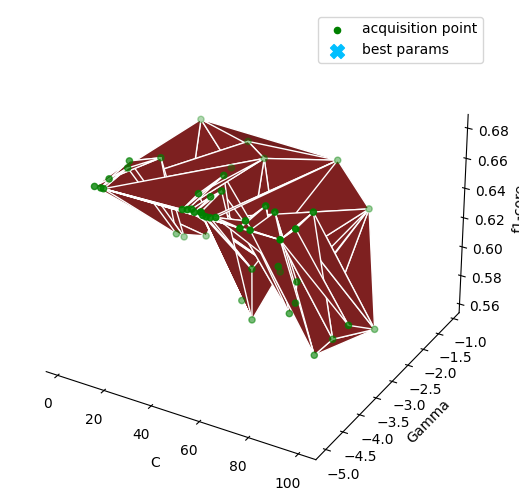

[LibSVM]              precision    recall  f1-score   support

         0.0       0.07      0.60      0.13         5
         1.0       0.94      0.46      0.62        70

    accuracy                           0.47        75
   macro avg       0.51      0.53      0.37        75
weighted avg       0.88      0.47      0.58        75

[LibSVM]              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.45      0.62        75

    accuracy                           0.45        75
   macro avg       0.50      0.23      0.31        75
weighted avg       1.00      0.45      0.62        75



In [16]:
#### SVM

from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
target=[]
C=[]
Gam=[]
from mpl_toolkits.mplot3d import Axes3D
def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = svm.SVC(C=C, gamma=gamma, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=5, kernel='rbf',max_iter=-1, probability=True, shrinking=False,tol=0.00001, verbose=False)
    cv = KFold(n_splits=5,shuffle=True,random_state=12)
    validation_loss = cross_validate(estimator, data, targets, scoring='f1', cv=5)
    return np.mean(validation_loss['test_score'])

def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C =expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)
    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (1, 100), "expGamma": (-5, -1)},
        random_state=1315,
        verbose=2
    )
    optimizer.maximize(init_points=20,n_iter=30)
    print("Final result:", optimizer.max)

    for res in optimizer.res:
        target.append(res['target'])
        C.append(res['params']["expC"])
        Gam.append(res['params']["expGamma"])
    return optimizer.max['params'],optimizer.max
if __name__ == "__main__":
    print("--- Optimizing SVM ---")
    param,p=optimize_svc(x_train,y_train.ravel())


fig = plt.figure() 
ax3 = Axes3D(fig, auto_add_to_figure=False) 
fig.add_axes(ax3)
# 绘制3D散点
ax3.plot_trisurf(C, Gam, target,edgecolor='white',color='brown',label='Sampling')
sc=ax3.scatter(C, Gam, target, color='green',label='acquisition point')
sc2=ax3.scatter(p['params']['expC'],p['params']['expGamma'],p['target'],color='deepskyblue',marker='X',label='best params',s=100)
ax3.grid(None)
ax3.set_xlabel('C')
ax3.set_ylabel('Gamma')
ax3.set_zlabel('f1-core')
ax3.legend(handles=[sc,sc2])
ax3.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.tight_layout()
plt.show()

lisvm2 = svm.SVC(C=100,gamma=10**-3.5,kernel='rbf',verbose=1)
lisvm2.fit(x_train, y_train.ravel())
pred_y2_r=lisvm2.predict(x_test)
SVM_f1=f1_score(y_test,pred_y2_r,average='macro')
SVM_acc=accuracy_score(y_test, pred_y2_r)
SVM_recall=recall_score(y_test, pred_y2_r, average='macro')
print(metrics.classification_report(np.array(pred_y2_r.ravel()), np.array(y_test.ravel())))

lisvm = svm.SVC(C=param['expC'],cache_size=300, class_weight=None, coef0=0.0, degree=5, gamma=10**param['expGamma'], kernel='rbf',max_iter=-1, probability=True, random_state=1314, shrinking=True,tol=0.00001, verbose=1)
lisvm.fit(x_train, y_train.ravel())
pred_y2_s=lisvm.predict(x_test)
SVM_f1=f1_score(y_test,pred_y2_s,average='macro')
SVM_acc=accuracy_score(y_test, pred_y2_s)
SVM_recall=recall_score(y_test, pred_y2_s, average='macro')
print(metrics.classification_report(np.array(pred_y2_s.ravel()), np.array(y_test.ravel())))

#### KNN

In [17]:
#### KNN

from sklearn.neighbors import KNeighborsClassifier
knn_or = KNeighborsClassifier()
p = {
    'n_neighbors':list(range(1,20,1)),
    "weights": ['uniform', "distance"]
}
# model = LR(penalty='l2',max_iter=10000)
cv = KFold(n_splits=5,shuffle=True,random_state=12)
GS_KNN = GridSearchCV(knn_or,p,cv=cv)
GS_KNN.fit(x_train,y_train)
print(GS_KNN.best_params_)
knn=KNeighborsClassifier(n_neighbors=GS_KNN.best_params_['n_neighbors'], weights=GS_KNN.best_params_['weights'])
knn.fit(x_train, y_train)
pred_y_n= knn.predict(x_test)
KNN_f1=f1_score(y_test,pred_y_n,average='macro')
KNN_acc=accuracy_score(y_test, pred_y_n)
KNN_recall=recall_score(y_test, pred_y_n, average='macro')
print(metrics.classification_report(np.array(pred_y_n.ravel()), np.array(y_test.ravel())))

{'n_neighbors': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.24      0.62      0.35        16
         1.0       0.82      0.47      0.60        59

    accuracy                           0.51        75
   macro avg       0.53      0.55      0.48        75
weighted avg       0.70      0.51      0.55        75



## 朴素贝叶斯

In [18]:

## 朴素贝叶斯

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_y_g = gnb.fit(x_train, y_train).predict(x_test)
g_f1=f1_score(y_test,pred_y_g,average='macro')
g_acc=accuracy_score(y_test, pred_y_g)
g_recall=recall_score(y_test, pred_y_g, average='macro')
print(metrics.classification_report(np.array(pred_y_g.ravel()), np.array(y_test.ravel())))

              precision    recall  f1-score   support

         0.0       0.05      0.67      0.09         3
         1.0       0.97      0.46      0.62        72

    accuracy                           0.47        75
   macro avg       0.51      0.56      0.36        75
weighted avg       0.93      0.47      0.60        75



## 1d-cnn

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1000, 16)          96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 16)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 32)           1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 8000)              0         
                                                                 
 dense_204 (Dense)           (None, 1)               

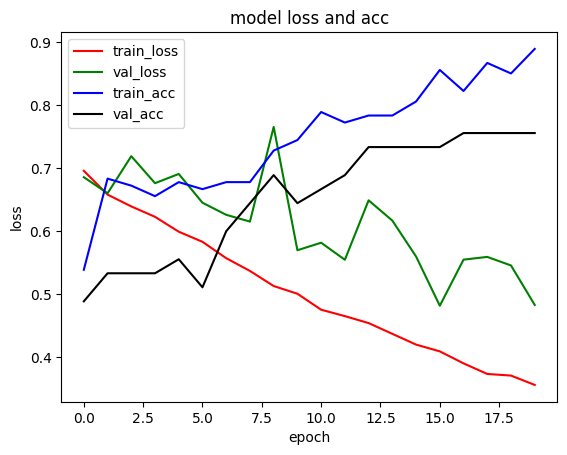

1d_cnn
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        48
           1       0.47      0.59      0.52        27

    accuracy                           0.61        75
   macro avg       0.60      0.61      0.60        75
weighted avg       0.64      0.61      0.62        75



In [19]:
## 1d-cnn

model1d=Sequential()
model1d.add(Convolution1D(input_shape=(1000,1),filters=16,kernel_size=5,padding='same',activation='relu'))
model1d.add(MaxPooling1D(pool_size=2,padding='same'))  #最大池化
model1d.add(Convolution1D(filters=32,kernel_size=3,padding='same',activation='relu'))
model1d.add(MaxPooling1D(pool_size=2,padding='same'))  #最大池化
model1d.add(Flatten())  #扁平化
model1d.add(Dense(1,activation='sigmoid'))
#查看网络结构
model1d.summary()
#编译模型
model1d.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
#训练模型
hist2=model1d.fit(x_train, y_train, validation_split=.2, batch_size=20, epochs=20)

plt.plot(hist2.history['loss'],color='r')
plt.plot(hist2.history['val_loss'],color='g')
plt.plot(hist2.history['accuracy'],color='b')
plt.plot(hist2.history['val_accuracy'],color='k')
plt.title('model loss and acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss','train_acc', 'val_acc'], loc='upper left')
plt.show()

pred_y_1d=model2.predict(x_test)
pred_y_1d=(pred_y_1d > 0.5).astype("int32")
cnn_f1=f1_score(y_test,pred_y_1d,average='micro')
cnn_acc=accuracy_score(y_test, pred_y_1d)
cnn_recall=recall_score(y_test, pred_y_1d, average='macro')

print("1d_cnn")
print(metrics.classification_report(np.array(pred_y_d), np.array(y_test)))

In [20]:
## adboost

In [21]:


from sklearn.ensemble import GradientBoostingClassifier
est = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
pred_y_ad= est.predict(x_test)
ad_f1=f1_score(y_test,pred_y_ad,average='macro')
ad_acc=accuracy_score(y_test, pred_y_ad)
ad_recall=recall_score(y_test, pred_y_ad, average='macro')
print(metrics.classification_report(np.array(pred_y_ad.ravel()), np.array(y_test.ravel())))


              precision    recall  f1-score   support

         0.0       0.54      0.88      0.67        25
         1.0       0.91      0.62      0.74        50

    accuracy                           0.71        75
   macro avg       0.72      0.75      0.70        75
weighted avg       0.79      0.71      0.71        75



In [23]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(x_test.shape)
# from lazypredict.Supervised import LazyClassifier, LazyRegressor
# clf = LazyClassifier(predictions = True)
# models, predictions = clf.fit(x_train, x_test, y_train, y_test)
# models


chart = pd.DataFrame({
    'Model': ['DNN','Logistic Regression','SVM','KNN','1d-cnn','GS'],
    'Accuracy':[DNN_acc,Rl_acc,SVM_acc,KNN_acc,cnn_acc,g_acc],
    'f1': [DNN_f1,Rl_f1,SVM_f1,KNN_acc,cnn_f1,g_f1],
    'Recall':[DNN_recall,Rl_recall,SVM_recall,KNN_acc,cnn_recall,g_recall],}
)
pd.set_option('display.colheader_justify', 'center')

print(chart)

         Model          Accuracy     f1      Recall 
0                  DNN  0.613333  0.613333  0.601148
1  Logistic Regression  0.546667  0.353448  0.500000
2                  SVM  0.453333  0.311927  0.500000
3                  KNN  0.506667  0.506667  0.506667
4               1d-cnn  0.613333  0.613333  0.601148
5                   GS  0.466667  0.356775  0.509684
